In [14]:
import  numpy       as  np
import  torch
from    matplotlib  import  pyplot  as  plt

from    sys         import  path
from    pathlib     import  Path
path.append(str(Path.cwd().parent))
from    deep_numerical.utils                    import  *
from    deep_numerical.numerical.distribution   import  *
from    train_utils     import  *

In [3]:
# alpha = torch.linspace(0,1,5)
alpha = [0.75]
res = 32
values, info = load_data(rf"/media/junseung/47a90e46-3a9d-467c-bbee-066752b68532/GWANGJAE/datasets_kinetic/Boltzmann_2D/biMaxwellian/coeff1.59e-01/res032/", resolution=res, alpha=alpha, part_index=range(1,4))

In [4]:
data = values['data']
data = data[:, :, None, None, ...]

v_max = 2/LAMBDA

v_grid = velocity_grid(2, res, v_max)
dv = 2*v_max/res
equi = maxwellian_homogeneous(v_grid, *compute_moments_homogeneous(data[:,0], v_grid))

In [5]:
n_inst, n_t = data.shape[:2]

tensor1 = data.reshape((n_inst*n_t*len(alpha), *data.shape[2:]))
tensor2 = equi[:, None, ...].repeat((1,51, 1, 1, 1, 1, 1)).reshape((180*51*len(alpha), *data.shape[2:]))
print(tensor1.shape, tensor2.shape)

torch.Size([9180, 1, 1, 32, 32, 1]) torch.Size([9180, 1, 1, 32, 32, 1])


In [6]:
deviance = relative_error(tensor1, tensor2)
entropy1 = compute_entropy_homogeneous(tensor1, dv)
entropy2 = compute_entropy_homogeneous(tensor2, dv)
non_equi = relative_error(entropy1, entropy2)
print(deviance.shape, non_equi.shape)

torch.Size([9180]) torch.Size([9180])


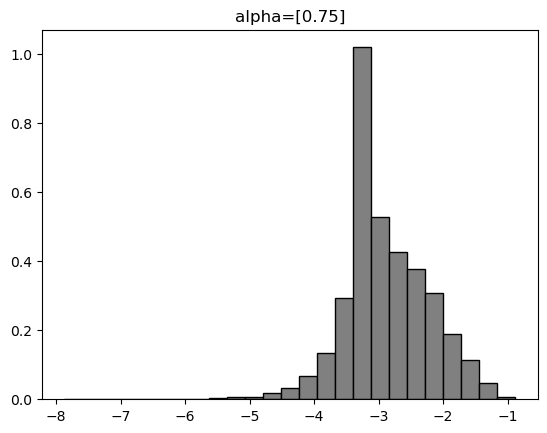

In [12]:
plt.title(f"{alpha=}")
density, bins, _ = plt.hist(non_equi.flatten().log10(), bins=25, density=True, color='gray', edgecolor='black')
plt.show()

In [16]:
np.abs(bins - np.linspace(bins.min(), bins.max(), len(bins))).max()

0.0

In [9]:
_bins = torch.tensor(bins)
_bins[0] -= 0.1
(torch.searchsorted(_bins, non_equi.flatten().log10()) == 1).sum()

tensor(136)

In [10]:
X = torch.arange(32).reshape(4, 8)
b = torch.tensor([3, 6, 9, 12, 20])
torch.searchsorted(b, X)

tensor([[0, 0, 0, 0, 1, 1, 1, 2],
        [2, 2, 3, 3, 3, 4, 4, 4],
        [4, 4, 4, 4, 4, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5]])

In [11]:
impo

NameError: name 'impo' is not defined